In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import quad
from scipy.special import ellipe
from scipy.special import ellipk

## User input

In [2]:
user = False
raddens = "../data/gasmsd_kpc_linear.txt"      # Gas density with 2 columns, units: KPC, MSUN/PC^2
units = 'KPC,MSUN/PC**2'
zlaw = 2                            # Case 2: sech-squared density law
mode = zlaw                         # Density distribution mode

# Parameters
G = 0.00000431158                   # Gravitational constant (KPC/MSUN*(KM/S)^2)  
CONSTANT = 2.0 * np.pi * G / 3.0
EPS = 1
z0 = 0.93
distance = 16.5                    # Distance in MPC
h = 10.0                           # GUESS: radial scale-length (KPC)
dens0 = 10**2.4                    # GUESS: central surface density (MSUN/KPC^2)

## Case 1: Import density profile

In [3]:
if user == True:
    if units == 'KPC,MSUN/PC**2':
        mudata = np.loadtxt(raddens)
        if np.shape(np.loadtxt(raddens))[1] == 2:     # this just checks if the file has 2 or 4 columns
            xdinp, ydinp = mudata.T
        if np.shape(np.loadtxt(raddens))[1] == 4:
            xdinp, ydinp, xerror, yerror = mudata.T
      
    if units == 'ARCSEC,MAG/ARCSEC**2':
        mudata = np.loadtxt(raddens)
        if np.shape(np.loadtxt(raddens))[1] == 2:
            xdinp, ydinp = mudata.T
        if np.shape(np.loadtxt(raddens))[1] == 4:
            xdinp, ydinp, xerror, yerror = mudata.T
                
        # Conversion
        # ARCSEC to KPC
        xdinp = 4.8481E-3 * distance * xdinp

        # MAG/ARCSEC^2 to MSUN/PC^2
        ydinp = 10**(-0.4 * ydinp)
        ydinp = (4.8481E-3 * distance)**(-2) * ydinp
        
    LEN1 = len(xdinp)                   # GUESS: defined as length of radius array
    LEN2 = len(ydinp)                   # GUESS: defined as lenght of density array
    ndinp = LEN2                        # number of surface densities. GUESS: length of density array again
    rcut = xdinp[ndinp-1]               # takes second to last radius value
    delta = rcut - xdinp[ndinp-2]       # difference between the second to last radius value and the third to last radius value

## Case 2: Calculate density profile 

In [4]:
if user == False:
    
    # User need to provide dens0 (in MSUN/PC^2) and h (in KPC)
    dens0 = dens0           # central density of exponential DISK
    # convert disk central surface brightness from MAG/ARCSEC^2 to MSUN/KPC^2
    #dens0 = 10**(-0.4 * dens0)       
    #dens0 = (4.8481E-3 * distance)**(-2) * dens0
    #dens0 = dens0 * 1.0e6        
    #print("dens0 = {:.4}".format(dens0))

    h = h                   # radial scale length
    z0 = 0.2*h              # scale height of DISK in kpc [0.0]. 
                              # note: The integration in Z is the most time consuming part
                              # of the calculation. For example it takes about 0.2 seconds
                              # to calculate a point on the rotation curve for a disk with zero
                              # thickness, and about 2 seconds for a disk with non-zero thickness.
    rcut = 4*h              # cutoff radius
    delta = 0.2*h           # softening parameter of DISK in kpc [0.0]. It may be wise
                              # to have a non-zero softening in case of a truncated disk, 
                              # because then the sharp features in the calculated rotation 
                              # curve will be smoothed out. A softening parameter of about 
                              # 0.2 scale lengths would be sufficient.

    # Now calculate the surface densities
    LEN1 = 100
    LEN2 = 100
    xdinp = np.zeros(LEN2-1)    # radii surface density
    ydinp = np.zeros(LEN2-1)    # surface densities
    rdinp = rcut + delta      # max radius, where galaxy ends
    ndinp = LEN2 - 1          # number of surface densities
    xstep = rdinp / (ndinp - 1)        # step in radius

    i = 0                              # counter 
    while i < ndinp:
        # Casertano's piecewise function, changed to the partial derivative drho/du
        xdinp[i] = x = xstep * i
        if x >= rcut and delta > 0.0:
            y = -(1/delta) * dens0 * np.exp(-rcut/h)
        if x >= rdinp:
            y = 0.0                    # end of disk
        else:
            y = -(1/h) * dens0 * np.exp(-x/h) # exponential disk
        ydinp[i] = y
        i += 1
print(ydinp)

[-25.11886432 -24.06508386 -23.05551134 -22.08829216 -21.16164952
 -20.27388117 -19.42335626 -18.60851237 -17.8278526  -17.07994289
 -16.3634093  -15.67693555 -15.01926058 -14.38917623 -13.78552502
 -13.20719804 -12.6531329  -12.12231176 -11.6137595  -11.1265419
 -10.65976393 -10.21256812  -9.78413296  -9.3736714   -8.98042943
  -8.60368465  -8.24274497  -7.89694735  -7.56565654  -7.24826397
  -6.94418657  -6.65286575  -6.37376635  -6.10637566  -5.85020248
  -5.60477622  -5.36964601  -5.14437994  -4.92856417  -4.72180225
  -4.52371435  -4.33393659  -4.15212034  -3.97793161  -3.81105039
  -3.65117014  -3.49799714  -3.35125002  -3.2106592   -3.07596641
  -2.94692421  -2.82329557  -2.70485336  -2.59138002  -2.48266708
  -2.37851483  -2.27873196  -2.18313515  -2.0915488   -2.00380466
  -1.91974153  -1.83920501  -1.76204713  -1.68812616  -1.6173063
  -1.54945746  -1.484455    -1.42217951  -1.36251658  -1.30535662
  -1.25059461  -1.19812998  -1.14786632  -1.09971131  -1.05357649
  -1.0093771

## Density distribution

In [5]:
# There are three distribution laws possible; 
# the Van der Kruit and Searle law (SECH-SQUARED): D(Z)=sech(Z/Z0)**2/Z0,
# an exponential density law (EXPONENTIAL): D(Z)=exp(-Z/Z0)/Z0 
# a simple sech law (SIMPLE-SECH): D(Z)=2*sech(Z/Z0)/Z0/PI. 

# case 1 is a flat disk, z0 = 0
#####################################

# Sech-squared law:
def denzed_case2(z,z0): 
    r = np.cosh(z / z0)
    r = r * r * z0
    r = 1.0 / r
    return r

# Exponential:
def denzed_case3(z,z0):
    r = np.exp(-z / z0) /z0
    return r

# Simple-sech
def denzed_case4(z,z0):
    r = 2 / z0 / np.pi / np.cosh(z/z0)
    return r

def denzed(z,z0,mode):
    #mode = input("Which Z density law? 2 or 3 or 4: ")
    #The above results in the user being asked for every point entered; this was likely used as a backend.
    if mode == 2:
        return denzed_case2(z,z0)
    if mode == 3:
        return denzed_case2(z,z0)
    if mode == 4:
        return denzed_case4(z,z0)
    else:
        return np.nan
        print("Error occured in denzed; no mode selected. Returned nan.")

In [6]:
# Casertano Eq 2
def drho_rz(r,z,z0,mode):
    return r * denzed(z,z0,mode)

## Lagrange interpolation

In [7]:
# interp does a Lagrange interpolation (second order)
def interpd(x1,y1,n1,x2,y2,n2):  
    i = 0

    while i < n2:
        x = x2[i]
        y = 0.0
        j = 1
        done = 0
        while (done != j) and (j < (n1 - 3)):
            if ((x1[j-1] <= x ) and (x1[j+1] >= x)):
                k = j - 1
                while (k <= j + 1):
                    f = 1.0
                    l = j - 1
                    while l <= j + 1:
                        if (l != k):
                            f *= (x - x1[l]) / (x1[k] - x1[l])
                        l += 1        
                    y += f * y1[k]
                    k += 1 
                done = 1
            j += 1
        if (y > 0.0):
            y2[i] = y
        else: 
            y2[i] = 0.0
        i += 1
    return x2,y2

## Functions

In [8]:
# Casertano Eq 5
def px(r,u,z):
    x = (r**2 + u**2 + z**2)/(2*r*u)
    return x - (np.sqrt((x**2)-1))

In [9]:
# Complete elliptic integral
def K(r,u,z):
    return ellipk(px(r,u,z)) - ellipe(px(r,u,z))

In [10]:
# Inner function
def innerfunc(r,u,z,z0,mode):
    return (4 * np.pi * G) * (drho_rz(r,z,z0,mode) * K(r,u,z) * 2 * np.sqrt(u)) / (np.pi * np.sqrt(r * px(r,u,z)))

In [11]:
# Define arrays
nradii = len(xdinp)
radius = xdinp
radius[0] = 0.000000000001             # prevent division by zero error
densit = np.zeros(LEN1+LEN2+1)

radius = interpd(xdinp, ydinp, ndinp, radius, densit, nradii)[0]
densit = interpd(xdinp, ydinp, ndinp, radius, densit, nradii)[1]

r = radius
u = np.arange(0,np.max(xdinp),0.2*h)
z = np.array([0.02, 0.50, 1.00, 3.00, 10.00])

In [12]:
print(densit)
print(ydinp)

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[-25.11886432 -24.06508386 -23.05551134 -22.08829216 -21.16164952
 -20.27388117 -19.42335626 -18.60851237 -17.8278526  -17.07994289
 -16.3634093  -15.67693555 -15.01926058 -14.38917623 -13.78552502
 -13.20719804 -12.6531329  -12.12231176 -11.6137595  -11.1265419
 -10.65976393 -10.21256812  -9.78413296  -9.3736714   -8.98042943
  -8.60368465  -8.24274497  -7.89694735  -7.56565654  -7.2

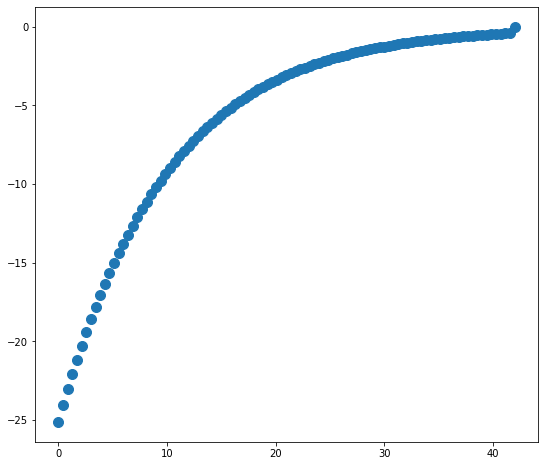

In [13]:
# Plot 
plt.figure(figsize=(9,8))
plt.scatter(xdinp,ydinp, s=100)
#plt.scatter(radius,densit)
plt.show()

## Integration

In [14]:
# Integrate inner function
innerfunc2 = lambda z,r,u,z0,mode: innerfunc(r,u,z,z0,mode)
innerintegr1 = lambda r,u,z0,mode: quad(innerfunc2, 0, np.inf, args=(r,u,z0,mode,))[0]

In [15]:
# Integrate outer function
innerintegr2 = lambda u,r,z0,mode: innerintegr1(r,u,z0,mode)
radialforce = lambda r,z0,mode: quad(innerintegr2, 0.1, 125, args=(r,z0,mode,))[0]

## Velocity

In [16]:
radialforce = np.vectorize(radialforce)
velocs = np.sqrt(r*radialforce(r,z0,mode))

C:\Users\JB\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in double_scalars
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\JB\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:12: RuntimeWarning: overflow encountered in double_scalars
  if sys.path[0] == '':
C:\Users\JB\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:11: RuntimeWarning: overflow encountered in cosh
  # This is added back by InteractiveShellApp.init_path()
C:\Users\JB\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\integrate\quadpack.py:385: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  warnings.warn(msg, IntegrationWarning)


## Plot

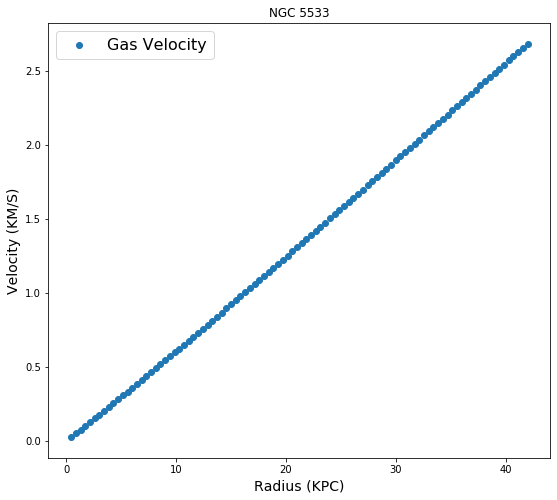

In [17]:
plt.figure(figsize=(9.0,8.0))             
plt.scatter(radius, velocs, linestyle='solid', label='Gas Velocity')
plt.axis('tight');
plt.title('NGC 5533')
plt.xlabel('Radius (KPC)', fontsize=14)
plt.ylabel('Velocity (KM/S)', fontsize=14)
plt.legend(fontsize=16)
plt.show()

In [18]:
print(radius)
print(velocs)

[1.00000000e-12 4.28571429e-01 8.57142857e-01 1.28571429e+00
 1.71428571e+00 2.14285714e+00 2.57142857e+00 3.00000000e+00
 3.42857143e+00 3.85714286e+00 4.28571429e+00 4.71428571e+00
 5.14285714e+00 5.57142857e+00 6.00000000e+00 6.42857143e+00
 6.85714286e+00 7.28571429e+00 7.71428571e+00 8.14285714e+00
 8.57142857e+00 9.00000000e+00 9.42857143e+00 9.85714286e+00
 1.02857143e+01 1.07142857e+01 1.11428571e+01 1.15714286e+01
 1.20000000e+01 1.24285714e+01 1.28571429e+01 1.32857143e+01
 1.37142857e+01 1.41428571e+01 1.45714286e+01 1.50000000e+01
 1.54285714e+01 1.58571429e+01 1.62857143e+01 1.67142857e+01
 1.71428571e+01 1.75714286e+01 1.80000000e+01 1.84285714e+01
 1.88571429e+01 1.92857143e+01 1.97142857e+01 2.01428571e+01
 2.05714286e+01 2.10000000e+01 2.14285714e+01 2.18571429e+01
 2.22857143e+01 2.27142857e+01 2.31428571e+01 2.35714286e+01
 2.40000000e+01 2.44285714e+01 2.48571429e+01 2.52857143e+01
 2.57142857e+01 2.61428571e+01 2.65714286e+01 2.70000000e+01
 2.74285714e+01 2.785714